In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
train_y = pd.read_csv('../raw/Train.csv')
train_x_ipt = pd.read_csv('../raw/Train_Inpatientdata.csv')
train_x_bnf = pd.read_csv('../raw/Train_Beneficiarydata.csv')
train_x_opt = pd.read_csv('../raw/Train_Outpatientdata.csv')

test_y = pd.read_csv('../raw/Test.csv')
test_x_ipt = pd.read_csv('../raw/Test_Inpatientdata.csv')
test_x_bnf = pd.read_csv('../raw/Test_Beneficiarydata.csv')
test_x_opt = pd.read_csv('../raw/Test_Outpatientdata.csv')

dt_y = pd.concat([train_y,test_y],axis=0)
dt_x_ipt = pd.concat([train_x_ipt,test_x_ipt],axis=0)
dt_x_opt = pd.concat([train_x_opt,test_x_opt],axis=0)
dt_x_bnf = pd.concat([train_x_bnf,test_x_bnf],axis=0)

## Target Dataset

### Preprocessing: Fill up null target values

In [ ]:
dt_y['PotentialFraud'] = dt_y['PotentialFraud'].fillna('Unknown')

In [ ]:
dt_y['PotentialFraud'].value_counts()

No         4904
Unknown    1353
Yes         506
Name: PotentialFraud, dtype: int64

## Outpatient and Inpatient: Dropping Features with Many Null Values

In [ ]:
dt_x_ipt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50025 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  50025 non-null  object 
 1   ClaimID                 50025 non-null  object 
 2   ClaimStartDt            50025 non-null  object 
 3   ClaimEndDt              50025 non-null  object 
 4   Provider                50025 non-null  object 
 5   InscClaimAmtReimbursed  50025 non-null  int64  
 6   AttendingPhysician      49882 non-null  object 
 7   OperatingPhysician      29419 non-null  object 
 8   OtherPhysician          5703 non-null   object 
 9   AdmissionDt             50025 non-null  object 
 10  ClmAdmitDiagnosisCode   50025 non-null  object 
 11  DeductibleAmtPaid       48930 non-null  float64
 12  DischargeDt             50025 non-null  object 
 13  DiagnosisGroupCode      50025 non-null  object 
 14  ClmDiagnosisCode_1      50025 non-null 

In [ ]:
dt_x_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643578 entries, 0 to 125840
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  643578 non-null  object 
 1   ClaimID                 643578 non-null  object 
 2   ClaimStartDt            643578 non-null  object 
 3   ClaimEndDt              643578 non-null  object 
 4   Provider                643578 non-null  object 
 5   InscClaimAmtReimbursed  643578 non-null  int64  
 6   AttendingPhysician      641866 non-null  object 
 7   OperatingPhysician      112221 non-null  object 
 8   OtherPhysician          242665 non-null  object 
 9   ClmDiagnosisCode_1      630547 non-null  object 
 10  ClmDiagnosisCode_2      400467 non-null  object 
 11  ClmDiagnosisCode_3      252523 non-null  object 
 12  ClmDiagnosisCode_4      156066 non-null  object 
 13  ClmDiagnosisCode_5      92310 non-null   object 
 14  ClmDiagnosisCode_6  

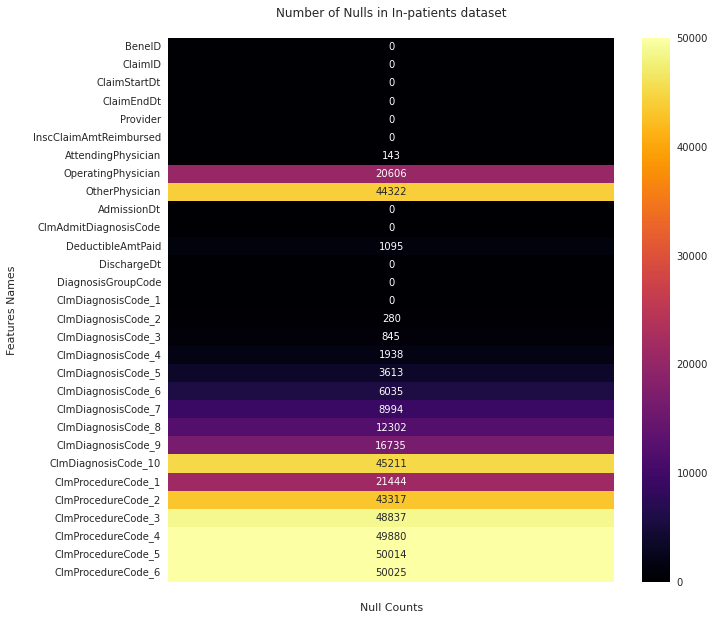

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,10))
    fig = sns.heatmap(pd.DataFrame(dt_x_ipt.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts")
    plt.ylabel("Features Names\n")
    plt.minorticks_on()
    plt.title("Number of Nulls in In-patients dataset\n")
    plt.plot();

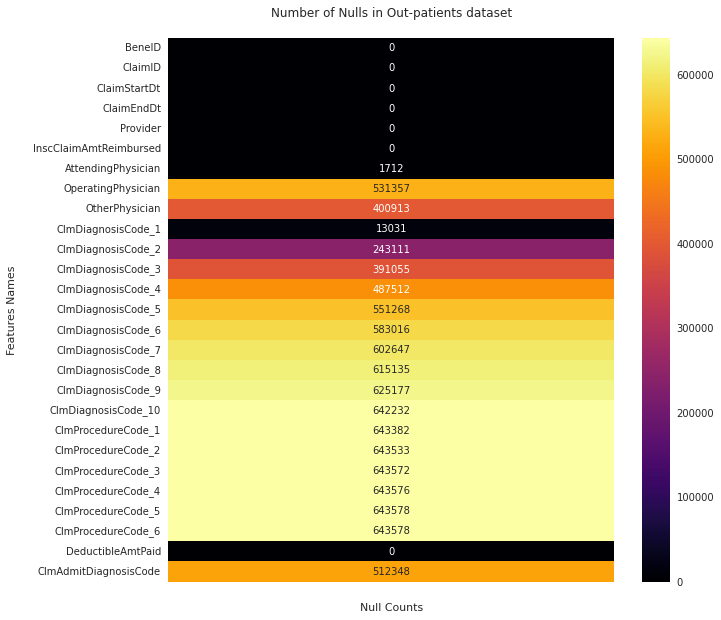

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,10))
    fig = sns.heatmap(pd.DataFrame(dt_x_opt.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts")
    plt.ylabel("Features Names\n")
    plt.minorticks_on()
    plt.title("Number of Nulls in Out-patients dataset\n")
    plt.plot();

In [ ]:
to_drop_opt = ['OtherPhysician']
for i in range(1,11):
    to_drop_opt.append(f'ClmDiagnosisCode_{i}')
for i in range(1,7):
    to_drop_opt.append(f'ClmProcedureCode_{i}')
dt_x_opt.drop(columns=to_drop_opt,inplace=True)
dt_x_ipt.drop(columns=to_drop_opt,inplace=True)

## Inpatient

### Inpatient: Preprocessing

#### claim_duration

In [ ]:
from datetime import datetime

In [ ]:
dt_x_ipt['ClaimStartDt']=dt_x_ipt['ClaimStartDt'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))
dt_x_ipt['ClaimEndDt']=dt_x_ipt['ClaimEndDt'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))

dt_x_opt['ClaimStartDt']=dt_x_opt['ClaimStartDt'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))
dt_x_opt['ClaimEndDt']=dt_x_opt['ClaimEndDt'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
dt_x_ipt['claim_duration']=(dt_x_ipt['ClaimEndDt']-dt_x_ipt['ClaimStartDt']).dt.days
dt_x_opt['claim_duration']=(dt_x_opt['ClaimEndDt']-dt_x_opt['ClaimStartDt']).dt.days

In [ ]:
dt_x_ipt.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,claim_duration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,2009-04-12,7866,1068.0,2009-04-18,201,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,2009-09-17,29590,1068.0,2009-09-20,883,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,2009-02-14,431,1068.0,2009-02-22,067,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,2009-08-13,78321,1068.0,2009-08-30,975,17


#### Map claims to each provider

In [ ]:
type(dt_y['Provider'].iloc[0])

str

In [ ]:
dt_ipt = dt_y.join(dt_x_ipt.set_index('Provider'),on='Provider',how='right').reset_index().drop(columns=['index'])
dt_ipt['PotentialFraud'].value_counts()

Yes        23402
No         17072
Unknown     9551
Name: PotentialFraud, dtype: int64

In [ ]:
dt_ipt.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,claim_duration
0,PRV55912,Yes,BENE11001,CLM46614,2009-04-12,2009-04-18,26000,PHY390922,NaN,2009-04-12,7866,1068.0,2009-04-18,201,6
1,PRV55912,Yes,BENE17521,CLM34721,2009-01-20,2009-02-01,19000,PHY349293,PHY370861,2009-01-20,45340,1068.0,2009-02-01,987,12
2,PRV55912,Yes,BENE21718,CLM72336,2009-10-17,2009-11-04,17000,PHY334706,PHY334706,2009-10-17,V5789,1068.0,2009-11-04,941,18
3,PRV55912,Yes,BENE22934,CLM73394,2009-10-25,2009-10-29,13000,PHY390614,PHY323689,2009-10-25,71946,1068.0,2009-10-29,506,4
4,PRV55912,Yes,BENE24402,CLM32911,2009-01-08,2009-01-12,3000,PHY380413,PHY432598,2009-01-08,1748,1068.0,2009-01-12,593,4


####  Fill null values of Attending Physicians and Operating Physicians

In [ ]:
dt_ipt['AttendingPhysician'].fillna('Unknown',inplace=True)

In [ ]:
dt_ipt['OperatingPhysician'].fillna('Unknown',inplace=True)

In [ ]:
dt_ipt['OperatingPhysician'].value_counts()

Unknown      20606
PHY429430      225
PHY350998      170
PHY356259      170
PHY341560      153
             ...  
PHY337068        1
PHY408159        1
PHY370409        1
PHY335412        1
PHY313255        1
Name: OperatingPhysician, Length: 10105, dtype: int64

### Inpatient: EDA

#### relationship claim duration and reimbursement amount

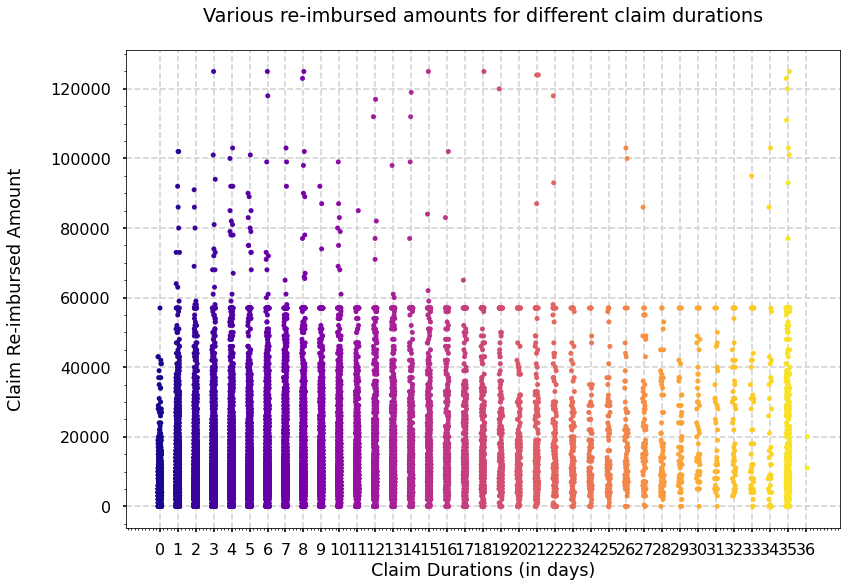

In [ ]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="claim_duration", y="InscClaimAmtReimbursed", data=dt_ipt, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)")
    plt.ylabel("Claim Re-imbursed Amount\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various re-imbursed amounts for different claim durations\n")
    plt.plot();

####  claim_duration

In [ ]:
dt_ipt.groupby(['PotentialFraud','Provider']).mean()['claim_duration'].reset_index()#[['PotentialFraud','DischargeDt']]

,PotentialFraud,Provider,claim_duration
0,No,PRV51001,5.000000
1,No,PRV51007,5.333333
2,No,PRV51008,4.000000
3,No,PRV51011,5.000000
4,No,PRV51023,3.555556
...,...,...,...
2607,Yes,PRV57631,5.388889
2608,Yes,PRV57642,6.347826
2609,Yes,PRV57667,11.000000
2610,Yes,PRV57697,5.104167


In [ ]:
grouped_fraud = dt_ipt.groupby(['PotentialFraud','Provider']).mean()['claim_duration'].reset_index()
grouped_fraud['claim_duration'] = grouped_fraud['claim_duration'].map(lambda x: np.round(x))
grouped_fraud = grouped_fraud.groupby(['claim_duration','PotentialFraud']).count()['Provider'].reset_index().set_index('claim_duration')
fraud = grouped_fraud[grouped_fraud['PotentialFraud']=='Yes']['Provider']
non_fraud = grouped_fraud[grouped_fraud['PotentialFraud']=='No']['Provider']
unknown_fraud = grouped_fraud[grouped_fraud['PotentialFraud']=='Unknown']['Provider']

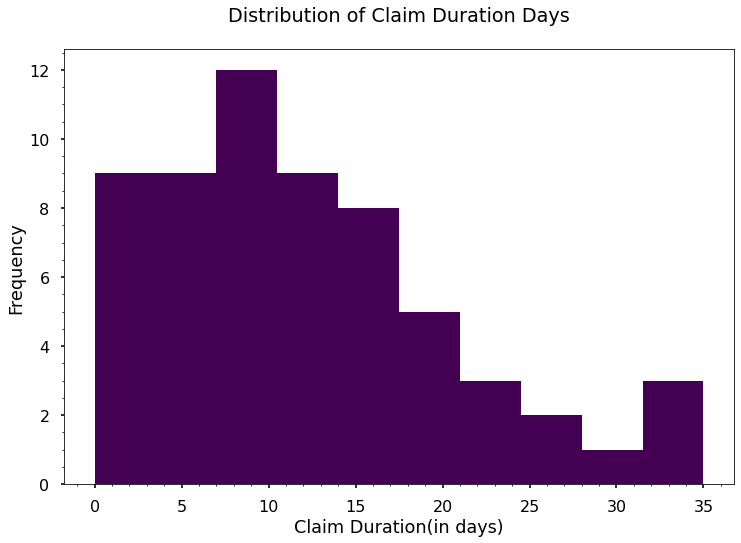

In [ ]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    pd.Series(grouped_fraud.index).plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

In [ ]:
print(fraud.shape)
print(non_fraud.shape)
print(unknown_fraud.shape)

dt_stacked = pd.DataFrame(grouped_fraud.index.unique(),columns=['claim_duration'])
dt_stacked=dt_stacked.join(fraud,on='claim_duration').rename({'Provider':'Fraud'},axis=1)
dt_stacked=dt_stacked.join(non_fraud,on='claim_duration').rename({'Provider':'Not Fraud'},axis=1)
dt_stacked=dt_stacked.join(unknown_fraud,on='claim_duration').rename({'Provider':'Unknown'},axis=1)
dt_stacked.fillna(0,inplace=True)

sum_ = dt_stacked['Fraud']+dt_stacked['Not Fraud']+dt_stacked['Unknown']
dt_stacked['Fraud']=dt_stacked['Fraud']/sum_
dt_stacked['Not Fraud']=dt_stacked['Not Fraud']/sum_
dt_stacked['Unknown']=dt_stacked['Unknown']/sum_
dt_stacked

(13,)
(26,)
(22,)


,claim_duration,Fraud,Not Fraud,Unknown
0,0.0,0.000000,1.000000,0.000000
1,1.0,0.000000,0.757576,0.242424
2,2.0,0.008621,0.801724,0.189655
3,3.0,0.013699,0.789954,0.196347
4,4.0,0.063158,0.751579,0.185263
5,5.0,0.231343,0.572761,0.195896
6,6.0,0.302867,0.507168,0.189964
7,7.0,0.208481,0.579505,0.212014
8,8.0,0.179856,0.589928,0.230216
9,9.0,0.128571,0.685714,0.185714


Text(0.5, 1.0, 'Percentage of Each Type of Claim by Mean Claim Duration')

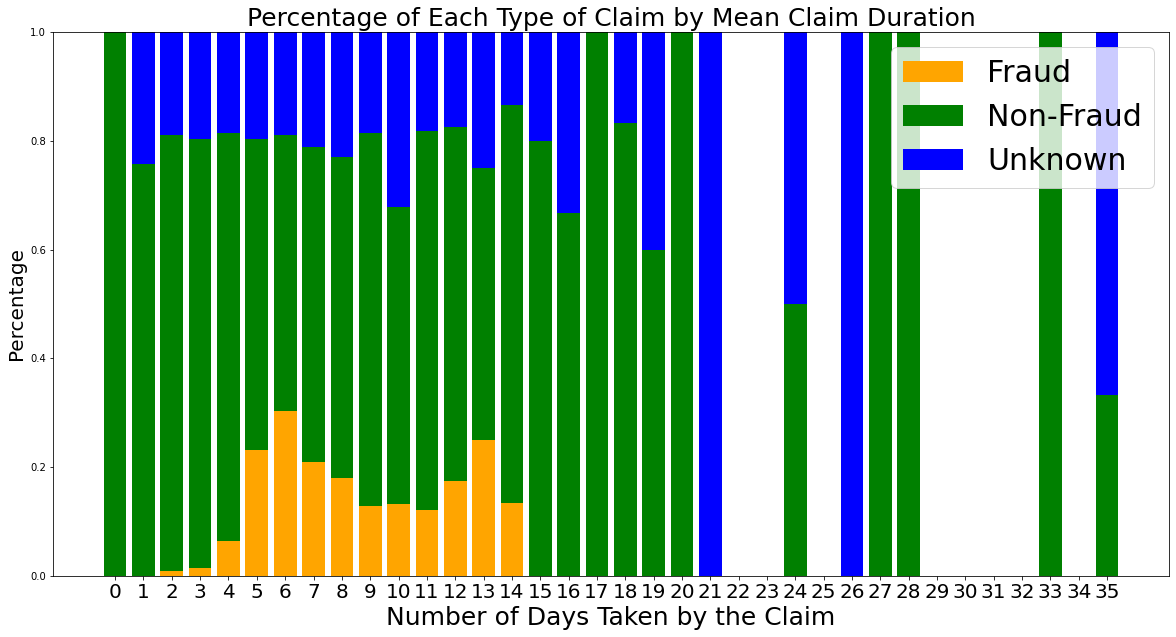

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(dt_stacked['claim_duration'],dt_stacked['Fraud'],color='orange')
plt.bar(dt_stacked['claim_duration'],dt_stacked['Not Fraud'],bottom = dt_stacked['Fraud'], color='green')
plt.bar(dt_stacked['claim_duration'],dt_stacked['Unknown'],bottom = np.array(dt_stacked['Fraud'])+np.array(dt_stacked['Not Fraud']), color='blue')
plt.xlabel('Number of Days Taken by the Claim',fontsize=25)
xticks = plt.xticks(np.linspace(0,35,36),fontsize=20)
plt.ylabel('Percentage',fontsize=20)
plt.legend(['Fraud','Non-Fraud','Unknown'],prop={'size':30})
plt.title('Percentage of Each Type of Claim by Mean Claim Duration',fontsize=25)

#### InscClaimAmtReimbursed

In [ ]:
import seaborn as sns

In [ ]:
dt_ipt.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,claim_duration
0,PRV55912,Yes,BENE11001,CLM46614,2009-04-12,2009-04-18,26000,PHY390922,Unknown,2009-04-12,7866,1068.0,2009-04-18,201,6
1,PRV55912,Yes,BENE17521,CLM34721,2009-01-20,2009-02-01,19000,PHY349293,PHY370861,2009-01-20,45340,1068.0,2009-02-01,987,12
2,PRV55912,Yes,BENE21718,CLM72336,2009-10-17,2009-11-04,17000,PHY334706,PHY334706,2009-10-17,V5789,1068.0,2009-11-04,941,18
3,PRV55912,Yes,BENE22934,CLM73394,2009-10-25,2009-10-29,13000,PHY390614,PHY323689,2009-10-25,71946,1068.0,2009-10-29,506,4
4,PRV55912,Yes,BENE24402,CLM32911,2009-01-08,2009-01-12,3000,PHY380413,PHY432598,2009-01-08,1748,1068.0,2009-01-12,593,4


Mean(Yes):11046.2443458702
Mean(No):9984.863109861197
Mean(Unknown):10372.972135183776


Text(0, 0.5, 'Density')

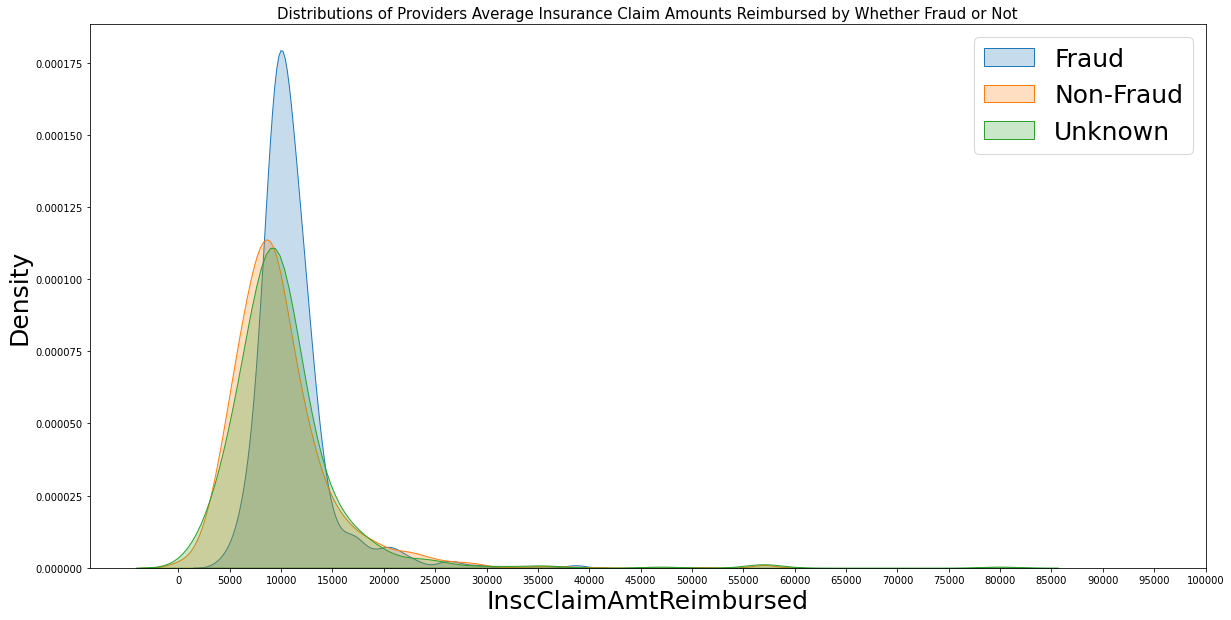

In [ ]:
plt.figure(figsize=(20,10))
claim_amount = dt_ipt.groupby(['PotentialFraud','Provider']).mean()['InscClaimAmtReimbursed'].reset_index()
for fraud in ['Yes','No','Unknown']:
    cur_dt = claim_amount[claim_amount['PotentialFraud']==fraud]
    print(f'Mean({fraud}):{cur_dt.InscClaimAmtReimbursed.mean()}')
    sns.kdeplot(cur_dt['InscClaimAmtReimbursed'],fill=True)
plt.legend(['Fraud','Non-Fraud','Unknown'],fontsize=25)
plt.xlabel('InscClaimAmtReimbursed',fontsize=25)
xticks = plt.xticks(np.linspace(0,100000,21))
plt.title('Distributions of Providers Average Insurance Claim Amounts Reimbursed by Whether Fraud or Not',fontsize=15)
plt.ylabel('Density',fontsize=25)

#### AttendingPhysician

In [ ]:
dt_ipt.groupby('PotentialFraud').nunique()['AttendingPhysician'].sum()

14335

In [ ]:
dt_ipt['AttendingPhysician'].nunique()

14173

Only 160 Physicians out of the 14172 have been part of more than one type of claims -- non-differentiating;
The rest of the physicians handle either only fraud claims or only non-fraud claims, or only unknown claims.

They may be collaborating with the providers in the frauds.

In [ ]:
fraud_physicians = set(dt_ipt[dt_ipt['PotentialFraud']=='Yes']['AttendingPhysician'])
not_fraud_physicians = set(dt_ipt[dt_ipt['PotentialFraud']=='No']['AttendingPhysician'])
unknown_physicians = set(dt_ipt[dt_ipt['PotentialFraud']=='Unknown']['AttendingPhysician'])

inter_f_nf = fraud_physicians.intersection(not_fraud_physicians)
inter_f_unk = fraud_physicians.intersection(unknown_physicians)
inter_nf_unk = not_fraud_physicians.intersection(unknown_physicians)
common = inter_f_nf.union(inter_f_unk).union(inter_nf_unk)

In [ ]:
len(common)

159

In [ ]:
dt_ipt_2 = dt_ipt[dt_ipt['AttendingPhysician'].isin(common)==False]
dt_ipt_2.groupby('PotentialFraud').nunique()['AttendingPhysician']

PotentialFraud
No         7491
Unknown    2568
Yes        3955
Name: AttendingPhysician, dtype: int64

In [ ]:
fraud_ipt_physicians = set(dt_ipt_2[dt_ipt_2['PotentialFraud']=='Yes']['AttendingPhysician'])
not_ipt_fraud_ipt_physicians = set(dt_ipt_2[dt_ipt_2['PotentialFraud']=='No']['AttendingPhysician'])
unknown_ipt_physicians = set(dt_ipt_2[dt_ipt_2['PotentialFraud']=='Unknown']['AttendingPhysician'])

## Outpatient

### Outpatient: Preprocessing

#### Map claims to each provider

In [ ]:
type(dt_y['Provider'].iloc[0])

str

In [ ]:
dt_opt = dt_y.join(dt_x_opt.set_index('Provider'),on='Provider',how='right').reset_index().drop(columns=['index'])
dt_opt['PotentialFraud'].value_counts()

No         328343
Yes        189394
Unknown    125841
Name: PotentialFraud, dtype: int64

In [ ]:
dt_opt.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,claim_duration
0,PRV56011,Yes,BENE11002,CLM624349,2009-10-11,2009-10-11,30,PHY326117,NaN,0,56409,0
1,PRV56011,Yes,BENE11004,CLM121801,2009-01-06,2009-01-06,40,PHY334319,NaN,0,NaN,0
2,PRV56011,Yes,BENE11004,CLM150998,2009-01-22,2009-01-22,200,PHY403831,NaN,0,71947,0
3,PRV56011,Yes,BENE11004,CLM173224,2009-02-03,2009-02-03,20,PHY339887,NaN,0,NaN,0
4,PRV56011,Yes,BENE11004,CLM224741,2009-03-03,2009-03-03,40,PHY345721,NaN,0,NaN,0


#### Fill null values of Attending Physicians and Operating Physicians

In [ ]:
dt_opt['AttendingPhysician'].fillna('Unknown',inplace=True)

In [ ]:
dt_opt['OperatingPhysician'].fillna('Unknown',inplace=True)

In [ ]:
dt_opt['AttendingPhysician'].value_counts()

PHY330576    2534
Unknown      1712
PHY350277    1628
PHY412132    1321
PHY423534    1223
             ... 
PHY344422       1
PHY380771       1
PHY338086       1
PHY367609       1
PHY318432       1
Name: AttendingPhysician, Length: 91151, dtype: int64

### Outpatient: EDA

#### relationship claim duration and reimbursement amount

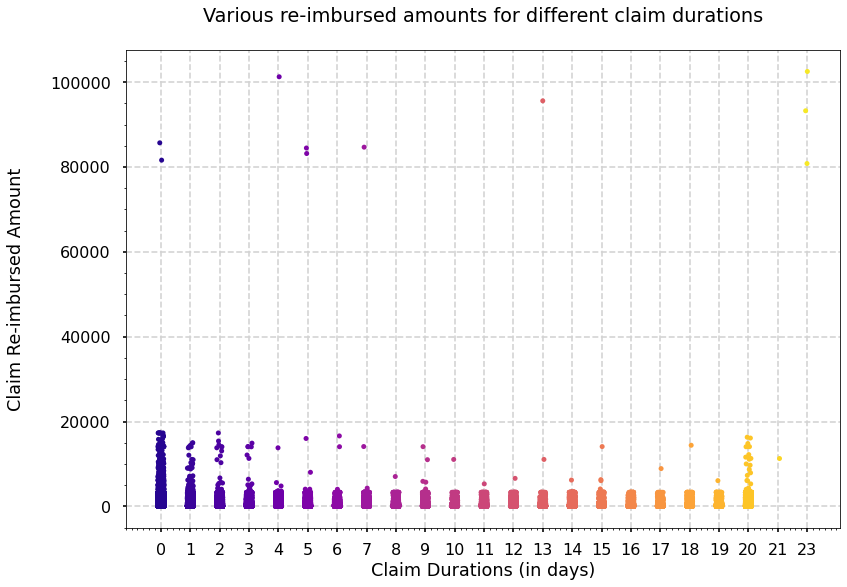

In [ ]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="claim_duration", y="InscClaimAmtReimbursed", data=dt_opt, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)")
    plt.ylabel("Claim Re-imbursed Amount\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various re-imbursed amounts for different claim durations\n")
    plt.plot();

####  claim_duration

In [ ]:
dt_opt.groupby(['PotentialFraud','Provider']).mean()['claim_duration'].reset_index()#[['PotentialFraud','DischargeDt']]

,PotentialFraud,Provider,claim_duration
0,No,PRV51001,0.550000
1,No,PRV51004,1.429530
2,No,PRV51007,0.768116
3,No,PRV51008,1.414634
4,No,PRV51011,0.473684
...,...,...,...
6266,Yes,PRV57569,2.647059
6267,Yes,PRV57642,0.949239
6268,Yes,PRV57672,1.242353
6269,Yes,PRV57697,1.166667


In [ ]:
grouped_fraud = dt_opt.groupby(['PotentialFraud','Provider']).mean()['claim_duration'].reset_index()
grouped_fraud['claim_duration'] = grouped_fraud['claim_duration'].map(lambda x: np.round(x))
grouped_fraud = grouped_fraud.groupby(['claim_duration','PotentialFraud']).count()['Provider'].reset_index().set_index('claim_duration')
fraud = grouped_fraud[grouped_fraud['PotentialFraud']=='Yes']['Provider']
non_fraud = grouped_fraud[grouped_fraud['PotentialFraud']=='No']['Provider']
unknown_fraud = grouped_fraud[grouped_fraud['PotentialFraud']=='Unknown']['Provider']

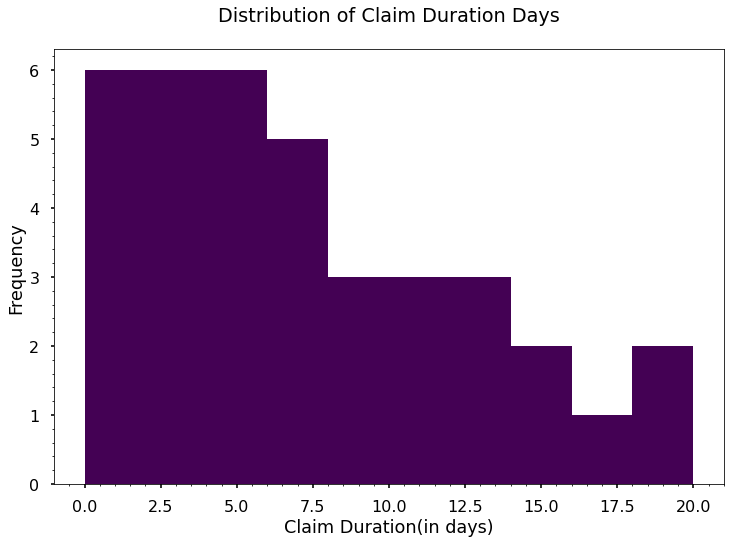

In [ ]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    pd.Series(grouped_fraud.index).plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

In [ ]:
print(fraud.shape)
print(non_fraud.shape)
print(unknown_fraud.shape)

dt_stacked = pd.DataFrame(grouped_fraud.index.unique(),columns=['claim_duration'])
dt_stacked=dt_stacked.join(fraud,on='claim_duration').rename({'Provider':'Fraud'},axis=1)
dt_stacked=dt_stacked.join(non_fraud,on='claim_duration').rename({'Provider':'Not Fraud'},axis=1)
dt_stacked=dt_stacked.join(unknown_fraud,on='claim_duration').rename({'Provider':'Unknown'},axis=1)
dt_stacked.fillna(0,inplace=True)

sum_ = dt_stacked['Fraud']+dt_stacked['Not Fraud']+dt_stacked['Unknown']
dt_stacked['Fraud']=dt_stacked['Fraud']/sum_
dt_stacked['Not Fraud']=dt_stacked['Not Fraud']/sum_
dt_stacked['Unknown']=dt_stacked['Unknown']/sum_
dt_stacked

(8,)
(14,)
(15,)


,claim_duration,Fraud,Not Fraud,Unknown
0,0.0,0.018471,0.775796,0.205732
1,1.0,0.106526,0.686737,0.206737
2,2.0,0.092336,0.724804,0.182861
3,3.0,0.048257,0.737265,0.214477
4,4.0,0.036765,0.757353,0.205882
5,5.0,0.032258,0.790323,0.177419
6,6.0,0.058824,0.882353,0.058824
7,7.0,0.000000,0.777778,0.222222
8,8.0,0.000000,0.571429,0.428571
9,9.0,0.000000,0.000000,1.000000


Text(0.5, 1.0, 'Percentage of Each Type of Claim by Mean Claim Duration')

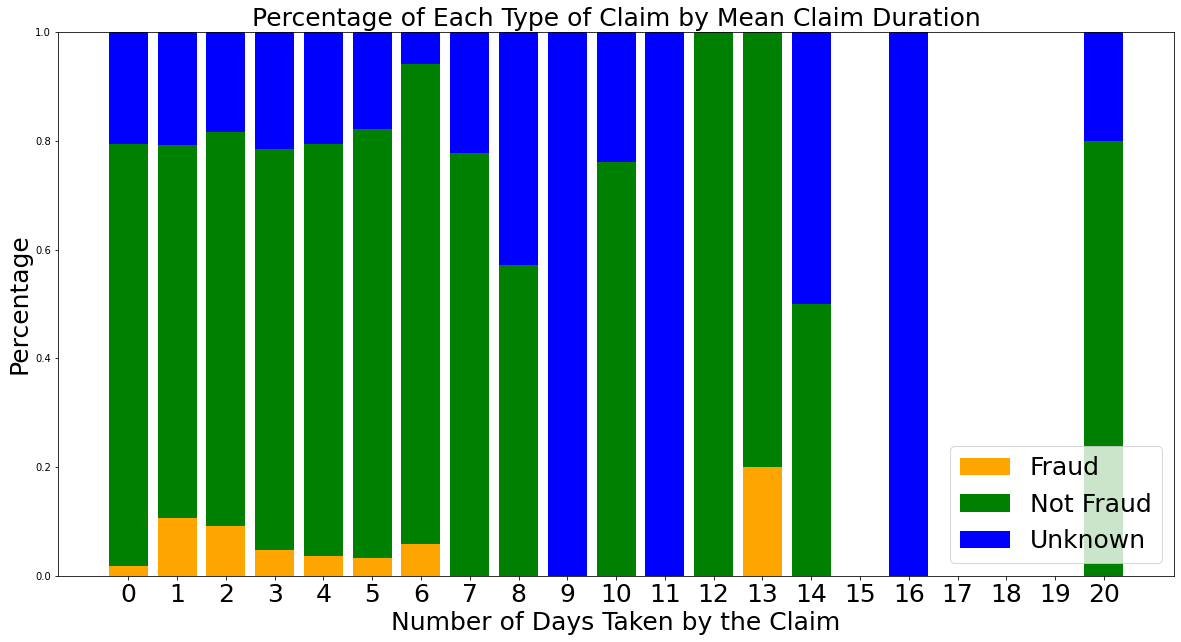

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(dt_stacked['claim_duration'],dt_stacked['Fraud'],color='orange')
plt.bar(dt_stacked['claim_duration'],dt_stacked['Not Fraud'],bottom = dt_stacked['Fraud'], color='green')
plt.bar(dt_stacked['claim_duration'],dt_stacked['Unknown'],bottom = np.array(dt_stacked['Fraud'])+np.array(dt_stacked['Not Fraud']), color='blue')
plt.legend(['Fraud','Not Fraud','Unknown'],fontsize=25)
plt.xlabel('Number of Days Taken by the Claim',fontsize=25)
xticks = plt.xticks(np.linspace(0,20,21),fontsize=25)
plt.ylabel('Percentage',fontsize=25)
plt.title('Percentage of Each Type of Claim by Mean Claim Duration',fontsize=25)

#### InscClaimAmtReimbursed

In [ ]:
import seaborn as sns

In [ ]:
dt_opt.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,claim_duration
0,PRV56011,Yes,BENE11002,CLM624349,2009-10-11,2009-10-11,30,PHY326117,Unknown,0,56409,0
1,PRV56011,Yes,BENE11004,CLM121801,2009-01-06,2009-01-06,40,PHY334319,Unknown,0,NaN,0
2,PRV56011,Yes,BENE11004,CLM150998,2009-01-22,2009-01-22,200,PHY403831,Unknown,0,71947,0
3,PRV56011,Yes,BENE11004,CLM173224,2009-02-03,2009-02-03,20,PHY339887,Unknown,0,NaN,0
4,PRV56011,Yes,BENE11004,CLM224741,2009-03-03,2009-03-03,40,PHY345721,Unknown,0,NaN,0


Mean(Yes):518.7246690887728
Mean(No):282.6167224218018
Mean(Unknown):290.43668433055535


Text(0, 0.5, 'Density')

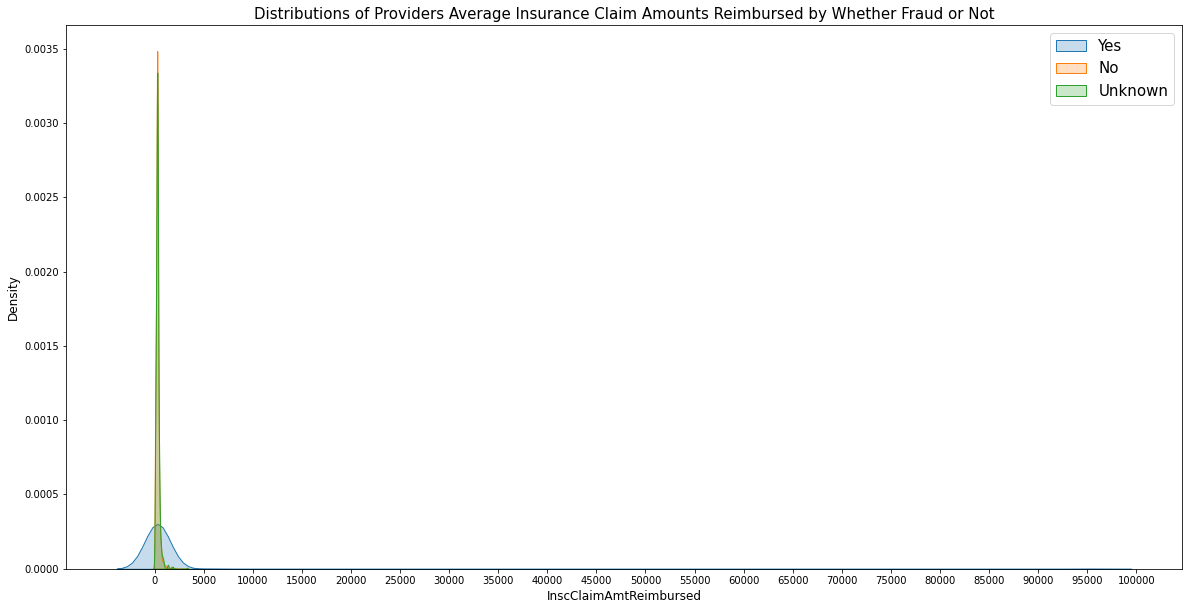

In [ ]:
plt.figure(figsize=(20,10))
claim_amount = dt_opt.groupby(['PotentialFraud','Provider']).mean()['InscClaimAmtReimbursed'].reset_index()
for fraud in ['Yes','No','Unknown']:
    cur_dt = claim_amount[claim_amount['PotentialFraud']==fraud]
    print(f'Mean({fraud}):{cur_dt.InscClaimAmtReimbursed.mean()}')
    sns.kdeplot(cur_dt['InscClaimAmtReimbursed'],fill=True)
plt.legend(['Yes','No','Unknown'],fontsize=15)
plt.xlabel('InscClaimAmtReimbursed',fontsize=12)
xticks = plt.xticks(np.linspace(0,100000,21))
plt.title('Distributions of Providers Average Insurance Claim Amounts Reimbursed by Whether Fraud or Not',fontsize=15)
plt.ylabel('Density',fontsize=12)

#### AttendingPhysician

In [ ]:
dt_opt.groupby('PotentialFraud').nunique()['AttendingPhysician'].sum()

94966

In [ ]:
dt_opt['AttendingPhysician'].nunique()

91151

Only 160 Physicians out of the 14172 have been part of more than one type of claims -- non-differentiating;
The rest of the physicians handle either only fraud claims or only non-fraud claims, or only unknown claims.

They may be collaborating with the providers in the frauds.

In [ ]:
fraud_physicians = set(dt_opt[dt_opt['PotentialFraud']=='Yes']['AttendingPhysician'])
not_fraud_physicians = set(dt_opt[dt_opt['PotentialFraud']=='No']['AttendingPhysician'])
unknown_physicians = set(dt_opt[dt_opt['PotentialFraud']=='Unknown']['AttendingPhysician'])

inter_f_nf = fraud_physicians.intersection(not_fraud_physicians)
inter_f_unk = fraud_physicians.intersection(unknown_physicians)
inter_nf_unk = not_fraud_physicians.intersection(unknown_physicians)
common = inter_f_nf.union(inter_f_unk).union(inter_nf_unk)

In [ ]:
len(common)

3748

In [ ]:
dt_opt_2 = dt_opt[dt_opt['AttendingPhysician'].isin(common)==False]
dt_opt_2.groupby('PotentialFraud').nunique()['AttendingPhysician']

PotentialFraud
No         54274
Unknown    17041
Yes        16088
Name: AttendingPhysician, dtype: int64

In [ ]:
fraud_opt_physicians = set(dt_opt_2[dt_opt_2['PotentialFraud']=='Yes']['AttendingPhysician'])
not_opt_fraud_opt_physicians = set(dt_opt_2[dt_opt_2['PotentialFraud']=='No']['AttendingPhysician'])
unknown_opt_physicians = set(dt_opt_2[dt_opt_2['PotentialFraud']=='Unknown']['AttendingPhysician'])